In [39]:
import pandas as pd
from bertopic import BERTopic

tweets = pd.read_csv('Data/Cleaned_TJ_new.csv')

model = BERTopic(language="multilingual")
topics, probs = model.fit_transform(tweets['full_text'])

model.get_topic_info().head(7).set_index('Topic')[['Count', 'Name', 'Representation']]

,Count,Name,Representation
Topic,,,
0,559,0_pt_transjakarta_min_ke_di,"[pt_transjakarta, min, ke, di, ya, dari, halte..."
1,15,1_tracking_live_google_maps,"[tracking, live, google, maps, di, fitur, pt_t..."


In [43]:
print(topic_list)

[[('pt_transjakarta', 0.1194450561660526), ('min', 0.07932663840214677), ('ke', 0.06448952147235976), ('di', 0.06299569805845416), ('ya', 0.061121057127750254), ('dari', 0.05680485813325311), ('halte', 0.0539639430406486), ('mau', 0.04374445112572973), ('ini', 0.04348819055660105), ('naik', 0.04272958947299838)], [('tracking', 0.23853083153193874), ('live', 0.2061380818953021), ('google', 0.198124352138468), ('maps', 0.17902231124596277), ('di', 0.14662533194647343), ('fitur', 0.14267393982018656), ('pt_transjakarta', 0.12465446344143304), ('https', 0.11070503945905333), ('co', 0.11070503945905333), ('ini', 0.07834124931782697)]]


In [44]:
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from gensim import corpora, models
import pyLDAvis
import pyLDAvis.gensim_models
from gensim.models.coherencemodel import CoherenceModel

topic_words = model.get_topics()
# topic_list = [words for topic, words in topic_words.items()]
topics = [[word for word, _ in topic_words[topic_id]] for topic_id in topic_words]
tokenized_docs = [[word for word in word_tokenize(doc.lower())] for doc in tweets['full_text']]

# Memuat dataset tweet
tweets = pd.read_csv('Data/Preprocessed_TJ_new.csv')

def preprocess(text):
    tokens = word_tokenize(text.lower())
    return tokens

tweets['processed'] = tweets['full_text'].apply(preprocess)

# Membuat dictionary dan corpus untuk LDA
dictionary = corpora.Dictionary(tweets['processed'])
corpus = [dictionary.doc2bow(text) for text in tweets['processed']]

# Create the coherence model
coherence_model = CoherenceModel(
    topics=topics, 
    texts=tokenized_docs, 
    dictionary=dictionary, 
    coherence='c_v'
)

# Get the coherence score
coherence_score = coherence_model.get_coherence()
print(f"Coherence Score: {coherence_score}")


Coherence Score: 0.9946905629451968


In [7]:
%pip install pyLDAvis

   ---------------------------------------- 0.0/2.6 MB ? eta -:--:--
   - -------------------------------------- 0.1/2.6 MB 1.7 MB/s eta 0:00:02
   -- ------------------------------------- 0.2/2.6 MB 1.7 MB/s eta 0:00:02
   ----- ---------------------------------- 0.4/2.6 MB 3.0 MB/s eta 0:00:01
   ------- -------------------------------- 0.5/2.6 MB 3.0 MB/s eta 0:00:01
   --------- ------------------------------ 0.6/2.6 MB 3.1 MB/s eta 0:00:01
   --------- ------------------------------ 0.6/2.6 MB 3.1 MB/s eta 0:00:01
   ----------------- ---------------------- 1.1/2.6 MB 3.6 MB/s eta 0:00:01
   ----------------- ---------------------- 1.2/2.6 MB 3.4 MB/s eta 0:00:01
   ---------------------- ----------------- 1.5/2.6 MB 3.6 MB/s eta 0:00:01
   ------------------------ --------------- 1.6/2.6 MB 3.5 MB/s eta 0:00:01
   -------------------------- ------------- 1.7/2.6 MB 3.5 MB/s eta 0:00:01
   ------------------------------- -------- 2.1/2.6 MB 3.9 MB/s eta 0:00:01
   ----------------


[notice] A new release of pip is available: 24.0 -> 24.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [10]:
tweets.head()

,Unnamed: 0,created_at,favorite_count,full_text,id_str,lang,location,quote_count,reply_count,retweet_count,username,keyword
0,0,Fri Jun 21 11:50:28 +0000 2024,0,gaasik nih pluit gadatang dah menit nunggu wid...,1804119693726486727,in,"Tangerang, Banten",0,0,0,totaeba_,Transjakarta
1,1,Fri Jun 21 11:43:35 +0000 2024,0,hallo sebernya penarikan dana tap in tap out s...,1804117959805395101,in,"Jakarta, Indonesia",0,1,0,haloakubecca,Transjakarta
2,2,Fri Jun 21 11:32:13 +0000 2024,1,halo halte pondok indah fasilitas duduk lansia...,1804115099902448074,in,NaN,0,1,1,JeaKelana,Transjakarta
3,3,Fri Jun 21 11:31:48 +0000 2024,1,udahnya kartu tap tulisannya reset tap in lift...,1804114994088583643,in,NaN,0,1,0,kokumble,Transjakarta
4,4,Fri Jun 21 11:30:00 +0000 2024,1,kokkkkk tj gabisa ditrack gmaps lagiiiiii,1804114544505294903,in,NaN,0,0,0,fadillahasya,Transjakarta


In [12]:
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from gensim import corpora, models
import pyLDAvis
import pyLDAvis.gensim_models

# Memuat dataset tweet
tweets = pd.read_csv('Data/Preprocessed_TJ_new.csv')

def preprocess(text):
    tokens = word_tokenize(text.lower())
    return tokens

tweets['processed'] = tweets['full_text'].apply(preprocess)

# Membuat dictionary dan corpus untuk LDA
dictionary = corpora.Dictionary(tweets['processed'])
corpus = [dictionary.doc2bow(text) for text in tweets['processed']]

# Melatih model LDA
num_topics = 5  # Ubah sesuai kebutuhan
lda_model = models.LdaModel(corpus, num_topics=num_topics, id2word=dictionary, passes=15)

# Melihat topik-topik yang diekstraksi
for idx, topic in lda_model.print_topics(num_topics=num_topics, num_words=10):
    print(f"Topic {idx}: {topic}")

# Visualisasi topik
lda_display = pyLDAvis.gensim_models.prepare(lda_model, corpus, dictionary, sort_topics=False)
pyLDAvis.show(lda_display)


Topic 0: 0.037*"rute" + 0.030*"halte" + 0.024*"halo" + 0.012*"bus" + 0.010*"rutenya" + 0.010*"gimana" + 0.010*"jam" + 0.010*"admin" + 0.010*"stasiun" + 0.009*"info"
Topic 1: 0.039*"halte" + 0.020*"tap" + 0.013*"tj" + 0.009*"turun" + 0.009*"cawang" + 0.009*"udah" + 0.008*"rute" + 0.008*"in" + 0.008*"penumpang" + 0.007*"arah"
Topic 2: 0.025*"tj" + 0.019*"gimana" + 0.014*"jam" + 0.011*"nunggu" + 0.011*"dateng" + 0.010*"rute" + 0.009*"bus" + 0.008*"pagi" + 0.008*"jalur" + 0.007*"halte"
Topic 3: 0.015*"c" + 0.011*"menit" + 0.010*"kembalikan" + 0.010*"halte" + 0.010*"halo" + 0.010*"bus" + 0.008*"pinang" + 0.007*"ranti" + 0.007*"jakarta" + 0.007*"jam"
Topic 4: 0.037*"jam" + 0.020*"bus" + 0.014*"koridor" + 0.014*"arah" + 0.010*"tj" + 0.010*"pagi" + 0.008*"halte" + 0.008*"banget" + 0.008*"nya" + 0.007*"s"


OSError: [Errno 22] Invalid argument: 'https://cdn.jsdelivr.net/gh/bmabey/pyLDAvis@3.4.0/pyLDAvis/js/ldavis.v1.0.0.css'

In [29]:
text_list = [i.split() for i in tweets['full_text']]

In [30]:
import gensim
#Create Bigram & Trigram Models 
from gensim.models import Phrases
# Add bigrams and trigrams to docs,minimum count 10 means only that appear 10 times or more.
bigram = Phrases(text_list, min_count=10)
for idx in range(len(text_list)):
    for token in bigram[text_list[idx]]:
        if '_' in token:
            # Token is a bigram, add to document.
            text_list[idx].append(token)

In [31]:
doc_term_matrix = [dictionary.doc2bow(doc) for doc in text_list]
print(len(doc_term_matrix))
print(doc_term_matrix[100])
tfidf = models.TfidfModel(doc_term_matrix) #build TF-IDF model
corpus_tfidf = tfidf[doc_term_matrix]

574
[(25, 1), (29, 1), (75, 1), (85, 1), (104, 2), (131, 1), (141, 1), (261, 1), (317, 1), (341, 1), (403, 1), (436, 2), (635, 1), (645, 1), (646, 1), (647, 1), (648, 1), (649, 1), (650, 2)]


In [32]:
from gensim.models.coherencemodel import CoherenceModel
from gensim.models.ldamodel import LdaModel
from gensim.corpora.dictionary import Dictionary
from numpy import array
#function to compute coherence values
def compute_coherence_values(dictionary, corpus, texts, limit, start, step):
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = LdaModel(corpus=corpus_tfidf, id2word=dictionary, num_topics=num_topics, iterations=100)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
        
    return model_list, coherence_values

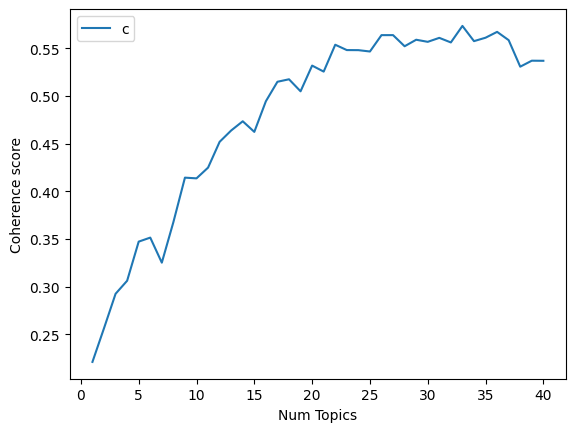

In [33]:
start=1
limit=41
step=1
model_list, coherence_values = compute_coherence_values(dictionary, corpus=corpus_tfidf, texts=text_list, start=start, limit=limit, step=step)
#show graphs
import matplotlib.pyplot as plt
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [24]:
model = LdaModel(corpus=corpus_tfidf, id2word=dictionary, num_topics=30) #num topic menyesuaikan hasil dari coherence value paling tinggi
for idx, topic in model.print_topics(-1):
    print('Topic: {} Word: {}'.format(idx, topic)) 

Topic: 0 Word: 0.009*"tije" + 0.009*"jcc" + 0.008*"halte" + 0.008*"malam" + 0.006*"kenapasih" + 0.006*"puri" + 0.006*"beta" + 0.006*"brp" + 0.006*"ragunan" + 0.005*"raya"
Topic: 1 Word: 0.007*"jam" + 0.006*"d" + 0.005*"tebet" + 0.005*"pgc" + 0.005*"dmn" + 0.005*"beroperasi" + 0.005*"prj" + 0.005*"nyambung" + 0.005*"lapor" + 0.005*"nih"
Topic: 2 Word: 0.006*"saharjo" + 0.006*"ruangguru" + 0.006*"keterusan" + 0.006*"turun" + 0.006*"lrt" + 0.006*"dukuh" + 0.006*"barito" + 0.006*"ges" + 0.006*"sampe" + 0.005*"ngapa"
Topic: 3 Word: 0.011*"halte" + 0.007*"sampe" + 0.007*"stuck" + 0.007*"rute" + 0.007*"jam" + 0.006*"duren" + 0.006*"pagi" + 0.006*"bnn" + 0.006*"terdekat" + 0.005*"doang"
Topic: 4 Word: 0.006*"emangnya" + 0.005*"crazy" + 0.005*"d" + 0.005*"juni" + 0.005*"tanggal" + 0.005*"mo" + 0.005*"prj" + 0.005*"rem" + 0.005*"bunderan" + 0.004*"parkir"
Topic: 5 Word: 0.007*"dm" + 0.007*"rutenya" + 0.006*"udah" + 0.006*"plumpang" + 0.006*"pagi" + 0.006*"halte" + 0.006*"hai" + 0.005*"skip" + 0.

In [35]:
%pip install sentence-transformers

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [36]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sentence_transformers import SentenceTransformer

Batches:   0%|          | 0/18 [00:00<?, ?it/s]

Cluster 0:
0    gaasik nih pluit gadatang dah menit nunggu wid...
1    hallo sebernya penarikan dana tap in tap out s...
2    halo halte pondok indah fasilitas duduk lansia...
3    udahnya kartu tap tulisannya reset tap in lift...
4            kokkkkk tj gabisa ditrack gmaps lagiiiiii
Name: full_text, dtype: object 

Cluster -1:
28     zaman batu gw harap apk ente rilis all platfor...
50                                        kemunduran lho
60                             pagi sctv tower halte pgc
71     kembalikan c kembalikan c kembalikan c kembali...
178                          udah isi form gabisa refund
Name: full_text, dtype: object 



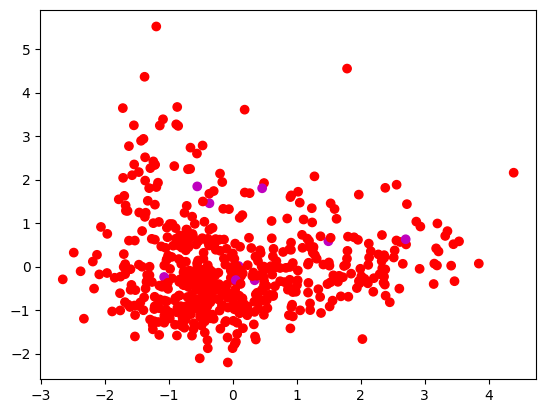

In [38]:
tweets = pd.read_csv('Data/Preprocessed_TJ_new.csv')

tweets['processed'] = tweets['full_text']

# Menggunakan SentenceTransformer untuk mendapatkan embedding
model = SentenceTransformer('paraphrase-MiniLM-L6-v2')
embeddings = model.encode(tweets['processed'].tolist(), show_progress_bar=True)

# Melakukan clustering dengan DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5, metric='cosine')
clusters = dbscan.fit_predict(embeddings)

# Menambahkan hasil clustering ke DataFrame
tweets['cluster'] = clusters

# Menampilkan beberapa contoh tweet dari setiap cluster
for cluster in set(clusters):
    print(f"Cluster {cluster}:")
    print(tweets[tweets['cluster'] == cluster]['full_text'].head(), "\n")

# Visualisasi hasil clustering dengan PCA
pca = PCA(n_components=2)
scatter_plot_points = pca.fit_transform(embeddings)
colors = ['r', 'b', 'g', 'y', 'c', 'm']

x_axis = [o[0] for o in scatter_plot_points]
y_axis = [o[1] for o in scatter_plot_points]

fig, ax = plt.subplots()
ax.scatter(x_axis, y_axis, c=[colors[d % len(colors)] for d in clusters])

plt.show()